# Logistic Regression 

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

In [1]:
#importing necessary libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
#loading the data
adult_df=pd.read_csv(r'C:\Users\dell\Downloads\adult_data.csv',header = None,delimiter=' *, *')
#its a special delimiter that  to remove the leaading ad trailing spaces around the feild
adult_df.head()

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
#create a copy of df
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev.duplicated().sum()

24

In [8]:
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(32537, 15)

In [9]:
adult_df_rev.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_df_rev.shape #dropping education coz it is a redundant to education number and fnlwgt is a coputed variable on the basis of age,race and sex

(32537, 13)

In [10]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [12]:
#printing all the unique values
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [13]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [14]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [15]:
adult_df_rev.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [16]:
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [17]:
adult_df_rev.workclass.mode()[0]

'Private'

In [18]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [19]:
#Measures of central Tendency
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""
#This code can help us decide at the runtime how to fill the missing values based on the datatype of the variable
#Should be used as a second hand approach

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [20]:
adult_df_rev.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

### Dummy variables using pd.get_dummies()

In [21]:
adult_df_rev_new=pd.get_dummies(adult_df_rev)#drop_first=True   
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
adult_df_rev_new.shape

(32537, 90)

In [23]:
adult_df_rev_new.dtypes

age                             int64
education_num                   int64
capital_gain                    int64
capital_loss                    int64
hours_per_week                  int64
                                ...  
native_country_United-States    uint8
native_country_Vietnam          uint8
native_country_Yugoslavia       uint8
income_<=50K                    uint8
income_>50K                     uint8
Length: 90, dtype: object

In [24]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [25]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
"""
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
""" 

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [26]:
adult_df_rev.head()
#0 - <=50k
#1 -  >50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [27]:
data={"Gender":["Female", "Male","Female"] }
df=pd.DataFrame(data)
df.head()

le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female


In [28]:
X = adult_df_rev.values[:,0:-1]  #--> 0 to -2
Y = adult_df_rev.values[:,-1]
#values will return an array whereas .iloc will return a df object
#arrays are lighter in weight which indirectly help the modelto build faster

In [29]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [30]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [31]:
print(X)

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


### Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10) 

In [33]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22775, 12)
(22775,)
(9762, 12)
(9762,)


In [34]:
#Using the Logistic regression model
from sklearn.linear_model import LogisticRegression
#create model obj
classifier= LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [35]:
print(list(zip(Y_test,Y_pred)))
 
#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)
#classifier.coef_


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

In [36]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.89035269, 0.10964731],
       [0.98760641, 0.01239359],
       [0.98078365, 0.01921635],
       ...,
       [0.87474272, 0.12525728],
       [0.97246196, 0.02753804],
       [0.87430819, 0.12569181]])

In [37]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1296 1070]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048


In [38]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)


[[0.89035269 0.10964731]
 [0.98760641 0.01239359]
 [0.98078365 0.01921635]
 ...
 [0.87474272 0.12525728]
 [0.97246196 0.02753804]
 [0.87430819 0.12569181]]


In [39]:

y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

## Evaluating the model

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[6928  468]
 [1174 1192]]
Accuracy of the model:  0.8317967629584102
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      7396
           1       0.72      0.50      0.59      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.72      0.74      9762
weighted avg       0.82      0.83      0.82      9762



In [41]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
    
#Always try to search for an optimum threshold where the overall error is minimum and the type 2 error is also lower

Errors at threshold  0.4 : 1672  , type 2 error : 1022  , type 1 error: 650
Errors at threshold  0.41000000000000003 : 1657  , type 2 error : 1047  , type 1 error: 610
Errors at threshold  0.42000000000000004 : 1665  , type 2 error : 1077  , type 1 error: 588
Errors at threshold  0.43000000000000005 : 1662  , type 2 error : 1103  , type 1 error: 559
Errors at threshold  0.44000000000000006 : 1652  , type 2 error : 1127  , type 1 error: 525
Errors at threshold  0.45000000000000007 : 1648  , type 2 error : 1147  , type 1 error: 501
Errors at threshold  0.4600000000000001 : 1642  , type 2 error : 1174  , type 1 error: 468
Errors at threshold  0.4700000000000001 : 1649  , type 2 error : 1202  , type 1 error: 447
Errors at threshold  0.4800000000000001 : 1668  , type 2 error : 1241  , type 1 error: 427
Errors at threshold  0.4900000000000001 : 1667  , type 2 error : 1265  , type 1 error: 402
Errors at threshold  0.5000000000000001 : 1680  , type 2 error : 1296  , type 1 error: 384
Errors at

In [42]:
#AUC for all points
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.8613964871921356


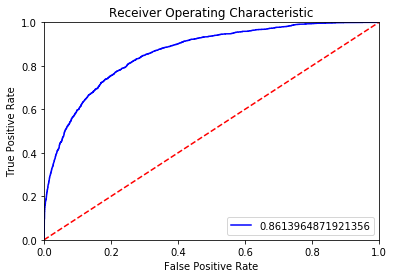

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

In [44]:
  from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7202632205752395
[0.         0.06327745 1.        ]
[0.         0.50380389 1.        ]


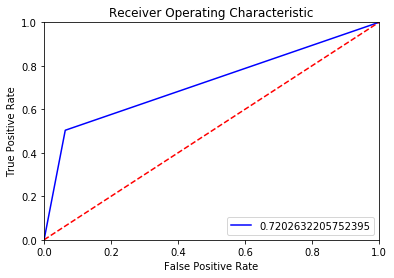

In [45]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC

In [46]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.81957858 0.82835821 0.82791923 0.81562774 0.82001756 0.82345191
 0.82345191 0.82784365 0.82301274 0.81774264]
0.8227004171577977


## Model Tuning

In [54]:
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test)  
#print(list(zip(Y_test,Y_pred)))

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7007  389]
 [1293 1073]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.827699241958615


In [49]:
#stratified k fold
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.82221247 0.82923617 0.82440737 0.81562774 0.81562774 0.81598595
 0.83662714 0.82608696 0.82476943 0.82301274]
0.8233593714755679


In [50]:
#model tuning
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test)  
#print(list(zip(Y_test,Y_pred)))

In [51]:
#Never to drop duplicated obs from the test data

In [52]:
#we fit the scalar obj only on the training data and us ethe same obj to transform both the training as well a sthe testing
# We never fit it on the test data bcoz the mean an dthe standard deviation returned by the test data could be diff from 
#the mean in the train data
#It could lead to inconsistent data after conversion